<a href="https://colab.research.google.com/github/Nargiz-chess/Solar_power_forecasting/blob/main/Australia_EDA%26preproccessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

from pandas import read_csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = '/content/drive/MyDrive/Master_thesis/Datasets/Australia/2012-2013.csv'

Mounted at /content/drive


In [ ]:
df = read_csv(path, header = 1, index_col = 4) 
df.head()
df.tail()

,Customer,Generator Capacity,Postcode,Consumption Category,0:30,1:00,1:30,2:00,2:30,3:00,3:30,4:00,4:30,5:00,5:30,6:00,6:30,7:00,7:30,8:00,8:30,9:00,9:30,10:00,10:30,11:00,11:30,12:00,12:30,13:00,13:30,14:00,14:30,15:00,15:30,16:00,16:30,17:00,17:30,18:00,18:30,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
29/06/2013,300,3.36,2086,GC,0.171,0.832,0.440,0.745,0.149,0.186,0.149,0.175,0.172,0.156,0.181,0.156,0.170,0.172,0.772,1.845,1.175,1.175,0.501,1.270,1.084,1.885,1.627,1.832,1.946,1.029,0.537,0.460,0.526,1.089,1.574,2.403,1.288,0.531,0.531,1.239,1.302,0.880,0.436,0.383,0.404,0.367,0.398,0.350,0.228,0.170,0.139,0.171,NaN
29/06/2013,300,3.36,2086,GG,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN
30/06/2013,300,3.36,2086,CL,2.501,2.475,2.491,2.508,2.490,2.502,0.339,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.468,NaN
30/06/2013,300,3.36,2086,GC,0.150,0.158,0.157,0.137,0.163,0.135,0.167,0.150,0.148,0.167,0.138,0.166,0.138,0.157,0.145,0.348,0.197,0.227,1.914,1.258,1.197,2.207,1.999,1.441,1.355,0.264,0.137,0.783,1.151,1.208,0.497,0.548,1.278,2.963,2.426,2.540,2.641,1.405,0.970,0.625,0.595,0.695,0.646,0.581,0.458,0.472,0.732,0.297,NaN
30/06/2013,300,3.36,2086,GG,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,NaN


In [ ]:
df.describe()

,Customer,Generator Capacity,Postcode,0:30,1:00,1:30,2:00,2:30,3:00,3:30,4:00,4:30,5:00,5:30,6:00,6:30,7:00,7:30,8:00,8:30,9:00,9:30,10:00,10:30,11:00,11:30,12:00,12:30,13:00,13:30,14:00,14:30,15:00,15:30,16:00,16:30,17:00,17:30,18:00,18:30,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality
count,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,268557.000000,0.0
mean,149.944753,1.667565,2204.082094,0.191606,0.187815,0.177450,0.146449,0.122789,0.101762,0.092597,0.087597,0.086926,0.088428,0.093490,0.101805,0.120080,0.148729,0.161920,0.186236,0.203562,0.223814,0.242024,0.257811,0.273643,0.286478,0.295502,0.301276,0.304481,0.303211,0.298070,0.288333,0.273189,0.258560,0.241366,0.224609,0.211548,0.207521,0.216288,0.229253,0.228285,0.220680,0.209521,0.202645,0.204150,0.196326,0.185252,0.177978,0.179462,0.170729,0.174827,0.184707,NaN
std,87.211044,1.021303,89.017488,0.450900,0.451111,0.440497,0.371905,0.313998,0.250837,0.217637,0.195519,0.192113,0.194940,0.207431,0.226901,0.266784,0.307578,0.309746,0.317744,0.307796,0.307316,0.308956,0.314655,0.326619,0.338659,0.349108,0.357734,0.363286,0.364583,0.360296,0.356452,0.346491,0.337602,0.328487,0.322567,0.323682,0.339299,0.375253,0.410106,0.418426,0.413482,0.397367,0.384334,0.383183,0.371170,0.353952,0.345505,0.363922,0.367877,0.394146,0.428466,NaN
min,1.000000,1.000000,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,73.000000,1.020000,2100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013000,0.019000,0.038000,0.047000,0.055000,0.060000,0.063000,0.063000,0.063000,0.064000,0.064000,0.063000,0.063000,0.056000,0.050000,0.040000,0.025000,0.013000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,150.000000,1.500000,2251.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019000,0.046000,0.081000,0.113000,0.138000,0.158000,0.175000,0.188000,0.197000,0.201000,0.206000,0.210000,0.208000,0.206000,0.197000,0.185000,0.172000,0.156000,0.139000,0.119000,0.100000,0.081000,0.059000,0.031000,0.013000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,226.000000,2.000000,2265.000000,0.150000,0.144000,0.137000,0.126000,0.119000,0.113000,0.109000,0.107000,0.106000,0.108000,0.110000,0.114000,0.127000,0.156000,0.183000,0.221000,0.255000,0.288000,0.319000,0.344000,0.369000,0.388000,0.400000,0.413000,0.413000,0.413000,0.406000,0.388000,0.367000,0.344000,0.314000,0.289000,0.270000,0.263000,0.263000,0.275000,0.285000,0.287000,0.285000,0.284000,0.290000,0.281000,0.263000,0.241000,0.221000,0.189000,0.171000,0.161000,NaN
max,300.000000,9.990000,2330.000000,5.941000,5.871000,5.584000,5.322000,4.340000,4.272000,4.268000,4.246000,4.305000,4.317000,4.051

# Information about columns (data description)

**Consumption Category**

Two letter code each meaning the following:

- GC = General Consumption for electricity supplied all the time (primary tariff, either inclining block or time of use rates), excluding solar generation and controlled load supply
- CL = Controlled Load Consumption (Off peak 1 or 2 tariffs)
- GG = Gross Generation for electricity generated by the solar system with a gross metering configuration, measured separately to household loads


Kilowatt hours (kWh) of electrical energy consumed or generated in the half hour ending at 0:30 (eg. between 0:00 and 0:30). The value is positive regardless of whether it is consumption or generation.

In [ ]:
#remove rows with GC and CL, remains only GG

df.columns
df = df[df['Consumption Category'] == 'GG']
df.head()

#df.info()


,Customer,Generator Capacity,Postcode,Consumption Category,0:30,1:00,1:30,2:00,2:30,3:00,3:30,4:00,4:30,5:00,5:30,6:00,6:30,7:00,7:30,8:00,8:30,9:00,9:30,10:00,10:30,11:00,11:30,12:00,12:30,13:00,13:30,14:00,14:30,15:00,15:30,16:00,16:30,17:00,17:30,18:00,18:30,19:00,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,0:00,Row Quality
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1/07/2012,1,3.78,2076,GG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006,0.038,0.088,0.175,0.281,0.419,0.581,0.619,0.681,0.488,0.513,0.125,0.950,1.156,1.056,0.700,0.600,0.200,0.044,0.006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2/07/2012,1,3.78,2076,GG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.019,0.025,0.044,0.244,0.481,0.663,0.769,0.844,1.000,0.775,0.756,0.869,0.725,0.744,0.913,0.631,0.294,0.031,0.006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3/07/2012,1,3.78,2076,GG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.019,0.031,0.050,0.213,0.481,0.663,0.769,0.838,0.919,1.000,1.031,1.100,1.138,1.006,0.838,0.688,0.350,0.069,0.013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4/07/2012,1,3.78,2076,GG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.019,0.044,0.081,0.413,0.556,0.750,0.763,0.831,0.944,1.031,0.925,0.588,0.681,0.700,0.219,0.494,0.256,0.044,0.006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5/07/2012,1,3.78,2076,GG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006,0.038,0.150,0.175,0.219,0.319,0.444,0.619,0.675,0.625,0.744,0.644,0.413,0.144,0.406,0.619,0.325,0.413,0.094,0.044,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
# summing kw half hours and converting 30 min data to 1 h interval data columns

#run it only once!!!

for col in df.columns:
  if "0" in col and df.columns.get_loc(col)%2 !=0:
    df[col] = df.iloc[:,df.columns.get_loc(col)] + df.iloc[:,df.columns.get_loc(col)-1]

for col in df.columns:
  if "30" in col:
    df = df.drop(columns = [col])

df.head()

,Customer,Generator Capacity,Postcode,Consumption Category,1:00,2:00,3:00,4:00,5:00,6:00,7:00,8:00,9:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,0:00,Row Quality
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1/07/2012,1,3.78,2076,GG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044,0.263,0.700,1.200,1.169,0.638,2.106,1.756,0.800,0.050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2/07/2012,1,3.78,2076,GG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019,0.069,0.725,1.432,1.844,1.531,1.594,1.657,0.925,0.037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3/07/2012,1,3.78,2076,GG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019,0.081,0.694,1.432,1.757,2.031,2.238,1.844,1.038,0.082,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4/07/2012,1,3.78,2076,GG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019,0.125,0.969,1.513,1.775,1.956,1.269,0.919,0.750,0.050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
5/07/2012,1,3.78,2076,GG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044,0.325,0.538,1.063,1.300,1.388,0.557,1.025,0.738,0.138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
print("Unique number of postcodes: ", len(df.Postcode.unique()))
print("Unique number of customers: ", len(df.Customer.unique()))

# df.Customer.unique()
# sorted(df.Postcode.unique())

Unique number of postcodes:  100
Unique number of customers:  300


In [ ]:
df.columns
# remove irrelevant columns 

#run only once

df = df.drop(columns = ['Generator Capacity', 'Consumption Category', 'Row Quality','Postcode'])

In [ ]:
df.head()

,Customer,1:00,2:00,3:00,4:00,5:00,6:00,7:00,8:00,9:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,0:00
date,,,,,,,,,,,,,,,,,,,,,,,,,
1/07/2012,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044,0.263,0.700,1.200,1.169,0.638,2.106,1.756,0.800,0.050,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2/07/2012,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019,0.069,0.725,1.432,1.844,1.531,1.594,1.657,0.925,0.037,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3/07/2012,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019,0.081,0.694,1.432,1.757,2.031,2.238,1.844,1.038,0.082,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4/07/2012,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019,0.125,0.969,1.513,1.775,1.956,1.269,0.919,0.750,0.050,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5/07/2012,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044,0.325,0.538,1.063,1.300,1.388,0.557,1.025,0.738,0.138,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.info()
# Converting the index as date
df.index = pd.to_datetime(df.index)

<class 'pandas.core.frame.DataFrame'>
Index: 109419 entries, 1/07/2012 to 30/06/2013
Data columns (total 25 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Customer  109419 non-null  int64  
 1   1:00      109419 non-null  float64
 2   2:00      109419 non-null  float64
 3   3:00      109419 non-null  float64
 4   4:00      109419 non-null  float64
 5   5:00      109419 non-null  float64
 6   6:00      109419 non-null  float64
 7   7:00      109419 non-null  float64
 8   8:00      109419 non-null  float64
 9   9:00      109419 non-null  float64
 10  10:00     109419 non-null  float64
 11  11:00     109419 non-null  float64
 12  12:00     109419 non-null  float64
 13  13:00     109419 non-null  float64
 14  14:00     109419 non-null  float64
 15  15:00     109419 non-null  float64
 16  16:00     109419 non-null  float64
 17  17:00     109419 non-null  float64
 18  18:00     109419 non-null  float64
 19  19:00     109419 non-null  float64
 2

In [ ]:
df.describe()

,Customer,1:00,2:00,3:00,4:00,5:00,6:00,7:00,8:00,9:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,0:00
count,109419.000000,109419.000000,109419.000000,109419.000000,109419.000000,109419.000000,109419.000000,109419.000000,109419.000000,109419.000000,109419.000000,109419.000000,109419.000000,109419.000000,109419.000000,109419.000000,109419.000000,109419.000000,109419.000000,109419.000000,109419.000000,109419.000000,109419.000000,109419.000000,109419.000000
mean,150.609931,0.000313,0.000639,0.000990,0.001226,0.001284,0.001361,0.016549,0.122959,0.334472,0.561584,0.737650,0.835812,0.861147,0.819433,0.697705,0.509959,0.296264,0.135647,0.040317,0.003879,0.000147,0.000142,0.000136,0.000150
std,86.540166,0.008810,0.021267,0.031876,0.038748,0.041426,0.041998,0.060247,0.189881,0.361157,0.509812,0.617038,0.700421,0.735561,0.719699,0.660920,0.566234,0.432325,0.265893,0.103991,0.016328,0.000938,0.000928,0.000898,0.001491
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019000,0.099000,0.227000,0.357000,0.434000,0.444000,0.406000,0.294000,0.142000,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,151.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.057000,0.238000,0.469000,0.638000,0.713000,0.732000,0.694000,0.576000,0.377000,0.144000,0.013000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,226.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013000,0.156000,0.464000,0.750000,0.963000,1.069000,1.100000,1.050000,0.900000,0.682000,0.419000,0.175000,0.038000,0.000000,0.000000,0.000000,0.000000,0.000000
max,300.000000,0.721000,1.267000,1.698000,1.873000,1.966000,1.984000,1.982000,4.776000,6.769000,7.694000,8.181000,8.475000,8.469000,8.662000,8.207000,7.482000,6.494000,4.607000,1.882000,0.519000,0.013000,0.013000,0.013000,0.149000


In [ ]:
# checking missing values per customer
# Customer 2 has only 284 days -> missing values
# drop customer 2

days_per_cust = list(df.groupby("Customer").count().iloc[:,0])
print(days_per_cust)

for i in days_per_cust:
  if i !=365:
    print(days_per_cust)

[365, 284, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365, 365,

In [ ]:
df = df[df['Customer'] !=2]
df.groupby("Customer").count().iloc[:,0]

#299 customers are left 

Customer
1      365
3      365
4      365
5      365
6      365
      ... 
296    365
297    365
298    365
299    365
300    365
Name: 1:00, Length: 299, dtype: int64

In [ ]:
df.head()

,Customer,1:00,2:00,3:00,4:00,5:00,6:00,7:00,8:00,9:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,0:00
date,,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-07,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044,0.263,0.700,1.200,1.169,0.638,2.106,1.756,0.800,0.050,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-02-07,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019,0.069,0.725,1.432,1.844,1.531,1.594,1.657,0.925,0.037,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-03-07,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019,0.081,0.694,1.432,1.757,2.031,2.238,1.844,1.038,0.082,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-04-07,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019,0.125,0.969,1.513,1.775,1.956,1.269,0.919,0.750,0.050,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2012-05-07,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044,0.325,0.538,1.063,1.300,1.388,0.557,1.025,0.738,0.138,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df = df.drop("Customer", axis=1)

In [ ]:
#bringing 00:00 to the front as weather and other data sourses start from 00:00
cols = df.columns.tolist()
cols = cols[-1:]+cols[:-1]
df=df[cols]
df.head()

,0:00,1:00,2:00,3:00,4:00,5:00,6:00,7:00,8:00,9:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
date,,,,,,,,,,,,,,,,,,,,,,,,
2012-01-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044,0.263,0.700,1.200,1.169,0.638,2.106,1.756,0.800,0.050,0.0,0.0,0.0,0.0,0.0,0.0
2012-02-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019,0.069,0.725,1.432,1.844,1.531,1.594,1.657,0.925,0.037,0.0,0.0,0.0,0.0,0.0,0.0
2012-03-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019,0.081,0.694,1.432,1.757,2.031,2.238,1.844,1.038,0.082,0.0,0.0,0.0,0.0,0.0,0.0
2012-04-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019,0.125,0.969,1.513,1.775,1.956,1.269,0.919,0.750,0.050,0.0,0.0,0.0,0.0,0.0,0.0
2012-05-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.044,0.325,0.538,1.063,1.300,1.388,0.557,1.025,0.738,0.138,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data = df.values
data.shape

data = data.reshape(299,24*365)
data.shape

data= data.transpose()
data.shape

#validate = 0.7 
data[10,0]

0.7

In [ ]:
df.describe()

,0:00,1:00,2:00,3:00,4:00,5:00,6:00,7:00,8:00,9:00,10:00,11:00,12:00,13:00,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
count,109135.000000,109135.000000,109135.000000,109135.000000,109135.000000,109135.000000,109135.000000,109135.000000,109135.000000,109135.000000,109135.000000,109135.000000,109135.000000,109135.000000,109135.000000,109135.000000,109135.000000,109135.000000,109135.000000,109135.000000,109135.000000,109135.000000,109135.000000,109135.000000
mean,0.000150,0.000314,0.000640,0.000992,0.001229,0.001287,0.001364,0.016560,0.122922,0.334064,0.561168,0.737394,0.835708,0.861162,0.819538,0.697883,0.510203,0.296549,0.135825,0.040381,0.003884,0.000146,0.000142,0.000135
std,0.001492,0.008822,0.021295,0.031917,0.038798,0.041480,0.042053,0.060292,0.189931,0.361232,0.510108,0.617559,0.701092,0.736309,0.720433,0.661584,0.566802,0.432719,0.266164,0.104109,0.016347,0.000936,0.000927,0.000895
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019000,0.097000,0.226000,0.357000,0.432000,0.444000,0.406000,0.294000,0.140000,0.025000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.057000,0.238000,0.469000,0.638000,0.713000,0.731000,0.694000,0.575000,0.377000,0.144000,0.014000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013000,0.156000,0.463000,0.744000,0.962000,1.066000,1.100000,1.050000,0.900000,0.682000,0.419000,0.175000,0.038000,0.000000,0.000000,0.000000,0.000000
max,0.149000,0.721000,1.267000,1.698000,1.873000,1.966000,1.984000,1.982000,4.776000,6.769000,7.694000,8.181000,8.475000,8.469000,8.662000,8.207000,7.482000,6.494000,4.607000,1.882000,0.519000,0.013000,0.013000,0.013000


In [ ]:
#Save the data in numpy formay
np.savetxt("/content/drive/MyDrive/Master_thesis/Datasets/Australia_numpy.npy", data) 

#Data without night hours

In [ ]:
cols2 = df.columns.tolist()
cols2 = cols2[5:23]
df2=df[cols2]
df2.head()

data2 = df2.values
data2 = data2.reshape(299,18*365)
data2.shape

data2= data2.transpose()
data2.shape

df2.head()

#validate = 0.7 
data2[5,0]

0.7

In [ ]:
#Save the data in numpy format
np.savetxt("/content/drive/MyDrive/Master_thesis/Datasets/Australia_numpy_removed_night_hours.npy", data2) 

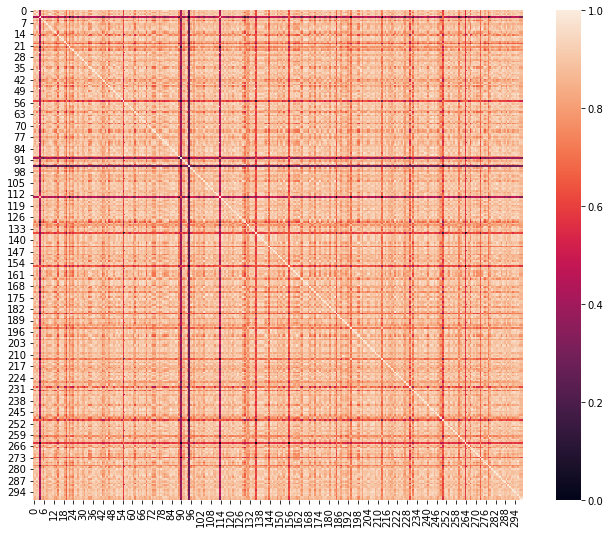

In [ ]:
import seaborn as sns
df = pd.DataFrame(data2)
corr_matrix = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmin=0, vmax=1, square=True, fmt='.2f', annot_kws={'size': 10})

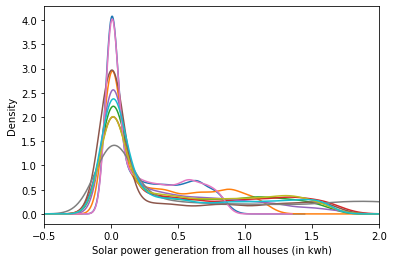

In [ ]:
for i in range(50,60):
  df[i].plot(kind='kde')
  plt.xlim([-0.5,2])
  plt.xlabel("Solar power generation from all houses (in kwh)")